In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/abds0/Desktop/DAP project/dataset.csv")
print("Rows and Columns:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
categorical_cols = [
    "Attrition", "Department", "Gender",
    "JobRole", "MaritalStatus"]
for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())

Rows and Columns: (1470, 31)

First 5 rows:
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  ...  PerformanceRating  RelationshipSatisfaction  Stock

In [2]:
import pandas as pd
df = pd.read_csv("C:/Users/abds0/Desktop/DAP project/dataset.csv")
print("\nMissing values in each column:")
print(df.isnull().sum())
print("\nDuplicate rows before:", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicate rows after:", df.duplicated().sum())
df['OverTime'] = df['OverTime'].str.strip()
df['OverTime'] = df['OverTime'].replace({
    'yes': 'Yes',
    'YES': 'Yes',
    'no': 'No',
    'NO': 'No'
})
remove_cols = ["EmployeeCount", "Over18", "StandardHours"]
df = df.drop(columns=["EmployeeCount", "Over18", "StandardHours"], errors='ignore')
print("\nDropped columns:", remove_cols)
df['Attrition'] = df['Attrition'].astype('category')
df['Gender'] = df['Gender'].astype('category')
print("\nUpdated column types:")
print(df.dtypes)


Missing values in each column:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

Duplicate rows before: 0

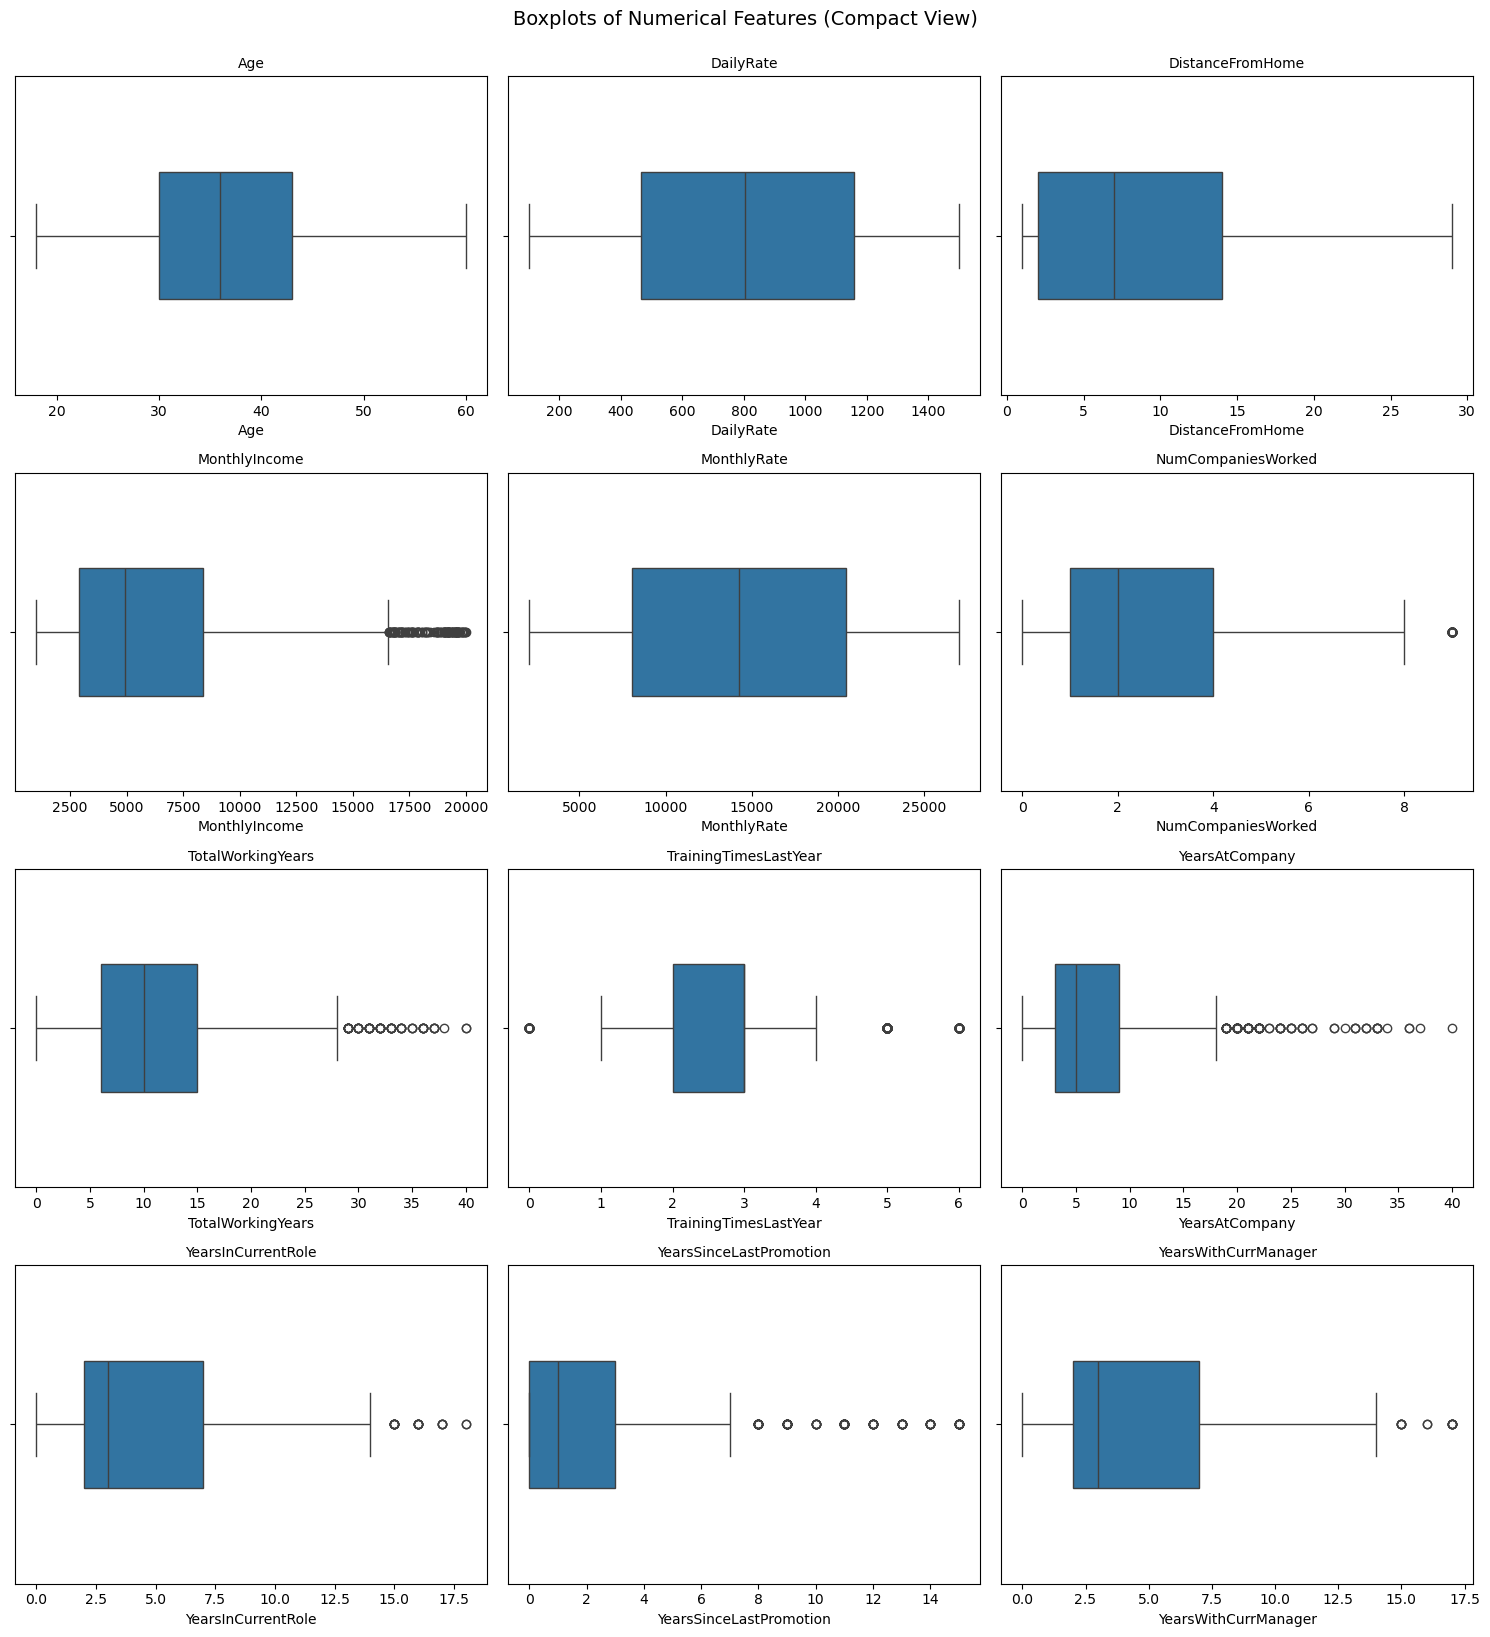

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
num_cols = [
    "Age", "DailyRate", "DistanceFromHome", "MonthlyIncome",
    "MonthlyRate", "NumCompaniesWorked", "TotalWorkingYears",
    "TrainingTimesLastYear", "YearsAtCompany", "YearsInCurrentRole",
    "YearsSinceLastPromotion", "YearsWithCurrManager"]
num_cols = [c for c in num_cols if c in df.columns]
n = len(num_cols)
rows = math.ceil(n / 3)   # grid with 3 columns
cols = 3
plt.figure(figsize=(15, 4 * rows))
for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x=df[col], width=0.4)
    plt.title(col, fontsize=10)
    plt.tight_layout()
plt.suptitle("Boxplots of Numerical Features (Compact View)", fontsize=14, y=1.02)
plt.show()

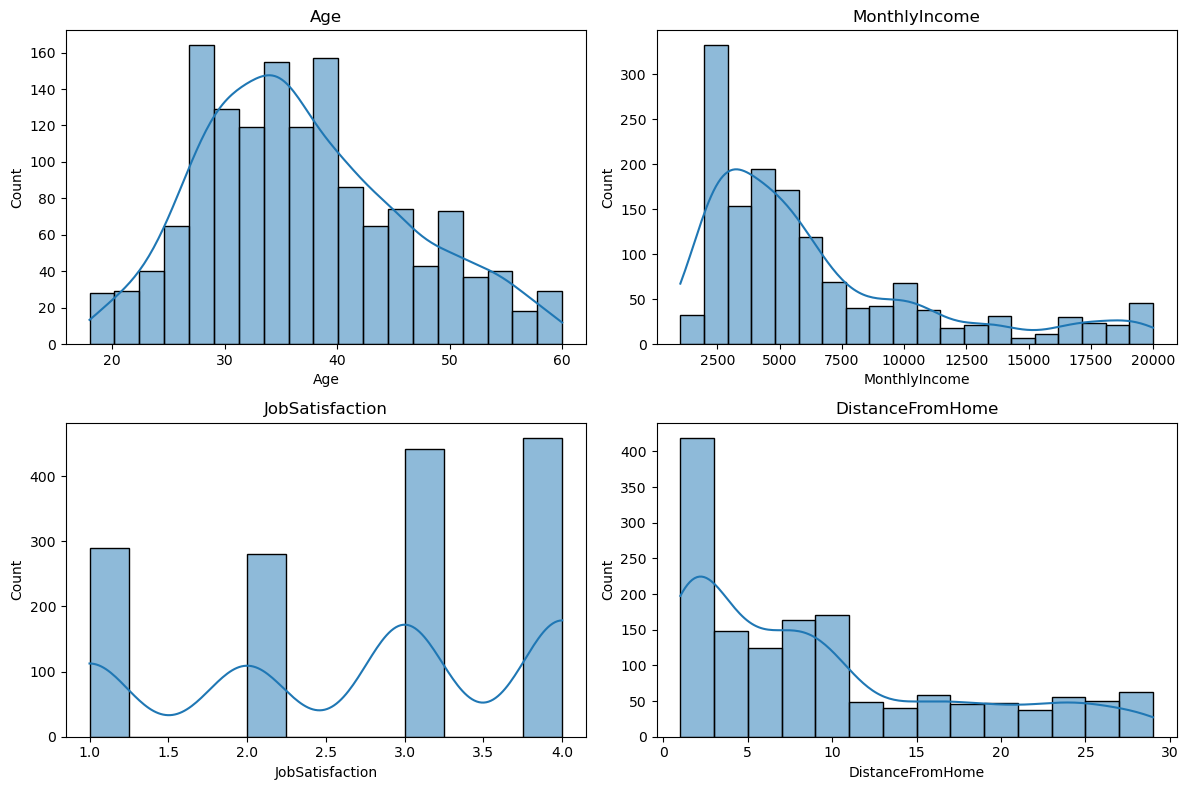

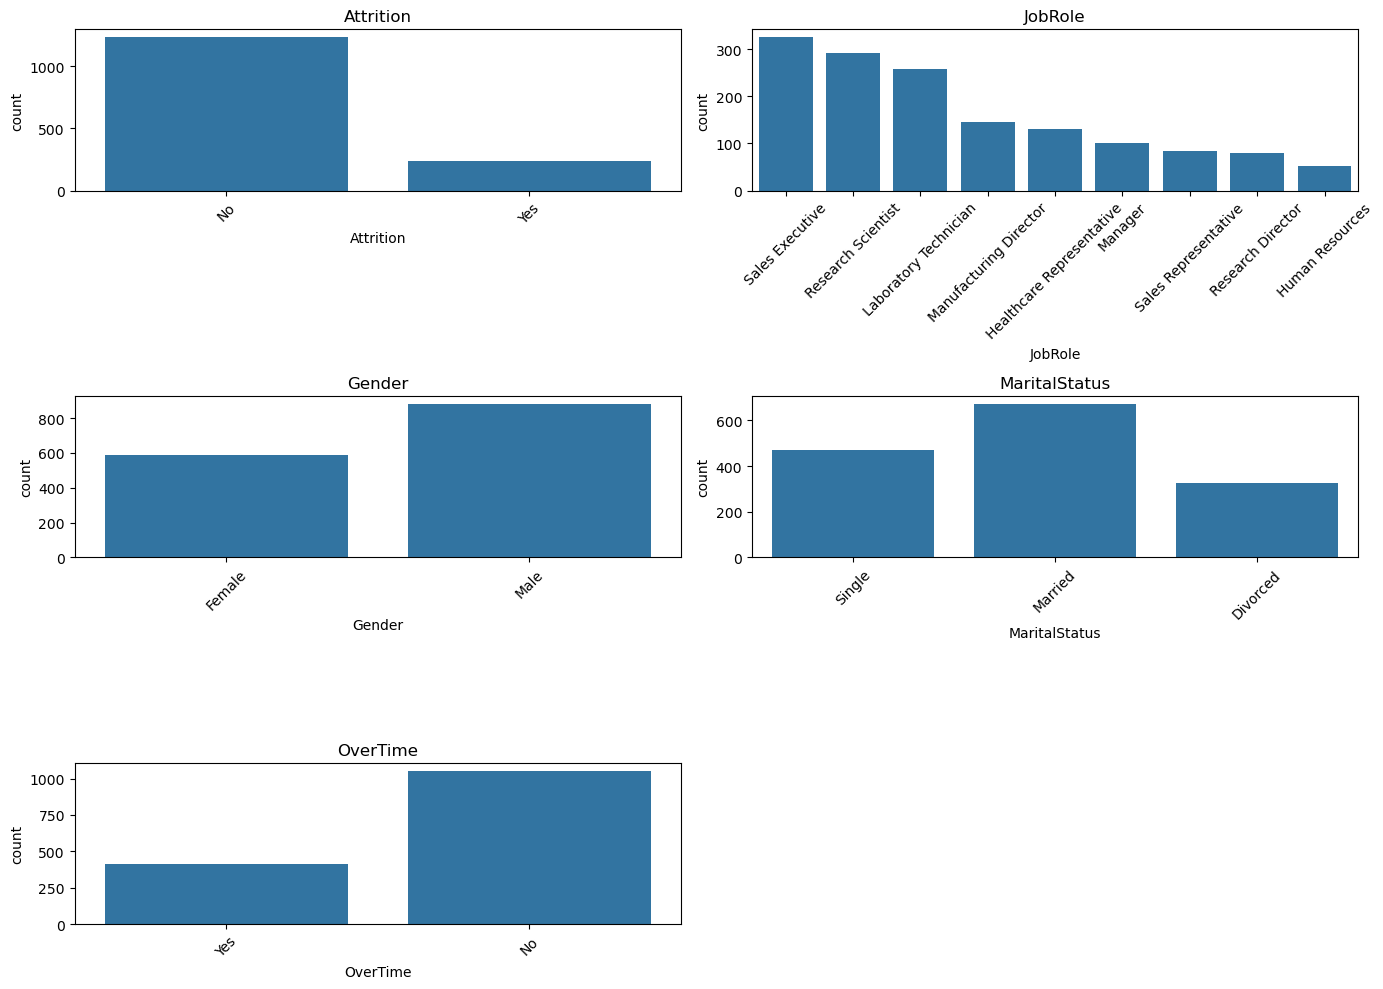

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
#Univariate: Numeric Histograms
num_cols = ['Age', 'MonthlyIncome', 'JobSatisfaction', 'DistanceFromHome']
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"{col}")
plt.tight_layout()
plt.show()
#Univariate: Categorical Countplots
cat_cols = ['Attrition', 'JobRole', 'Gender', 'MaritalStatus', 'OverTime']
plt.figure(figsize=(14, 10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=df, x=col)
    plt.title(f"{col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

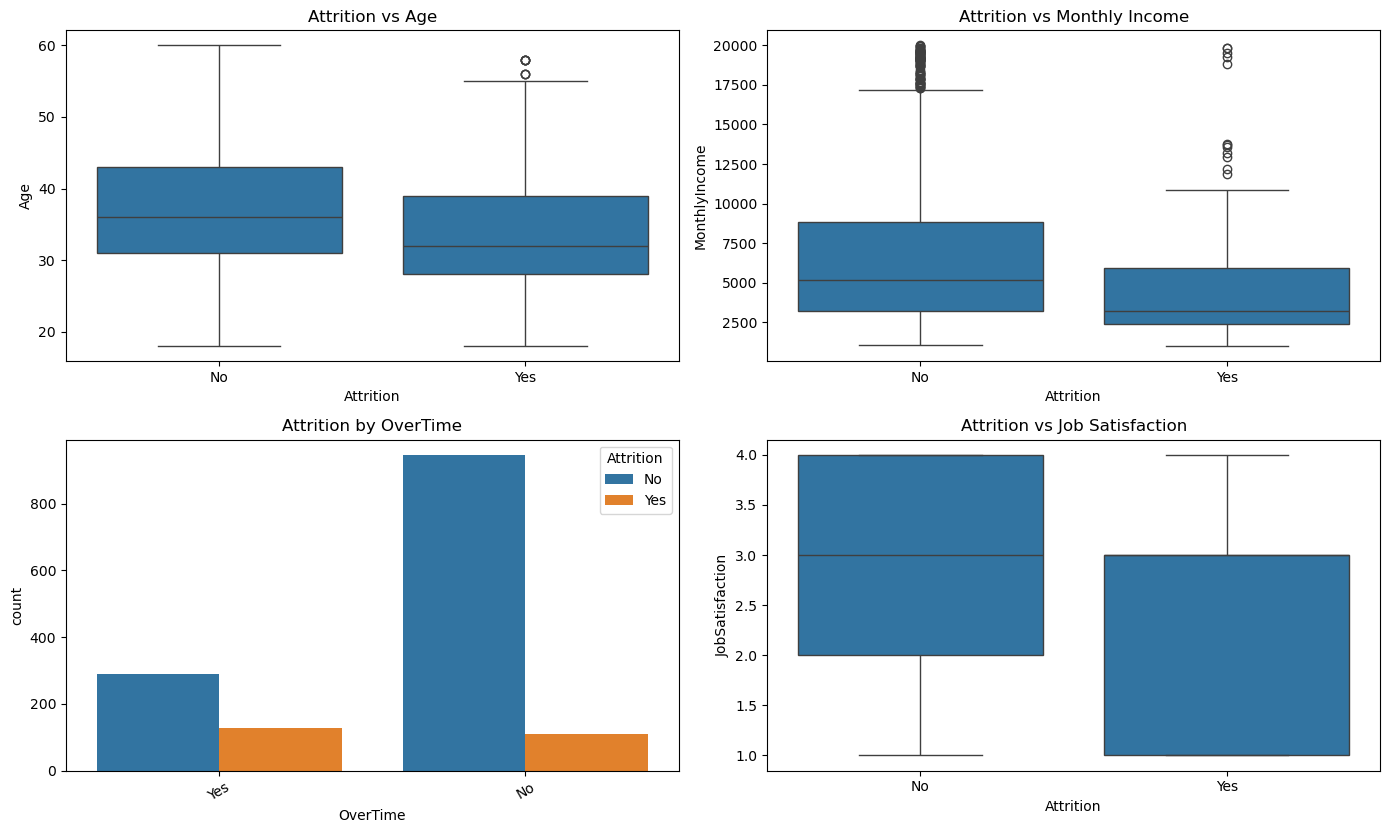

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 12))

# ---------- Attrition vs Age ----------
plt.subplot(3, 2, 1)
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title("Attrition vs Age")

# ---------- Attrition vs MonthlyIncome ----------
plt.subplot(3, 2, 2)
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title("Attrition vs Monthly Income")

# ---------- Attrition vs OverTime ----------
plt.subplot(3, 2, 3)
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title("Attrition by OverTime")
plt.xticks(rotation=30)

# ---------- Attrition vs JobSatisfaction ----------
plt.subplot(3, 2, 4)
sns.boxplot(x='Attrition', y='JobSatisfaction', data=df)
plt.title("Attrition vs Job Satisfaction")

plt.tight_layout()
plt.show()



📌 Pearson Correlation Matrix:
                        Age  MonthlyIncome  DistanceFromHome  DailyRate  \
Age                1.000000       0.497855         -0.001686   0.010661   
MonthlyIncome      0.497855       1.000000         -0.017014   0.007707   
DistanceFromHome  -0.001686      -0.017014          1.000000  -0.004985   
DailyRate          0.010661       0.007707         -0.004985   1.000000   
MonthlyRate        0.028051       0.034814          0.027473  -0.032182   
TotalWorkingYears  0.680381       0.772893          0.004628   0.014515   
YearsAtCompany     0.311309       0.514285          0.009508  -0.034055   

                   MonthlyRate  TotalWorkingYears  YearsAtCompany  
Age                   0.028051           0.680381        0.311309  
MonthlyIncome         0.034814           0.772893        0.514285  
DistanceFromHome      0.027473           0.004628        0.009508  
DailyRate            -0.032182           0.014515       -0.034055  
MonthlyRate           1.0000

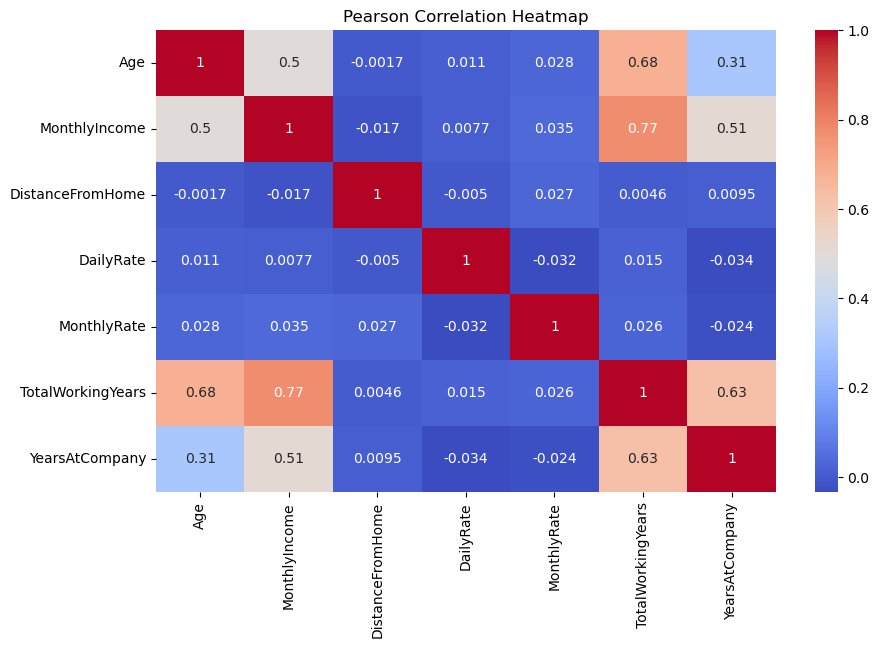

In [6]:
# Select important numerical columns for Pearson
pearson_cols = [
    'Age', 'MonthlyIncome', 'DistanceFromHome',
    'DailyRate', 'MonthlyRate',
    'TotalWorkingYears', 'YearsAtCompany'
]

print("\n📌 Pearson Correlation Matrix:")
pearson_corr = df[pearson_cols].corr(method='pearson')
print(pearson_corr)

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm')
plt.title("Pearson Correlation Heatmap")
plt.show()



📌 Spearman Correlation Matrix:
                         Education  JobLevel  WorkLifeBalance  \
Education                 1.000000  0.107419         0.017350   
JobLevel                  0.107419  1.000000         0.040466   
WorkLifeBalance           0.017350  0.040466         1.000000   
JobSatisfaction          -0.005175 -0.000852        -0.029781   
EnvironmentSatisfaction  -0.027625 -0.000192         0.027169   

                         JobSatisfaction  EnvironmentSatisfaction  
Education                      -0.005175                -0.027625  
JobLevel                       -0.000852                -0.000192  
WorkLifeBalance                -0.029781                 0.027169  
JobSatisfaction                 1.000000                -0.002993  
EnvironmentSatisfaction        -0.002993                 1.000000  


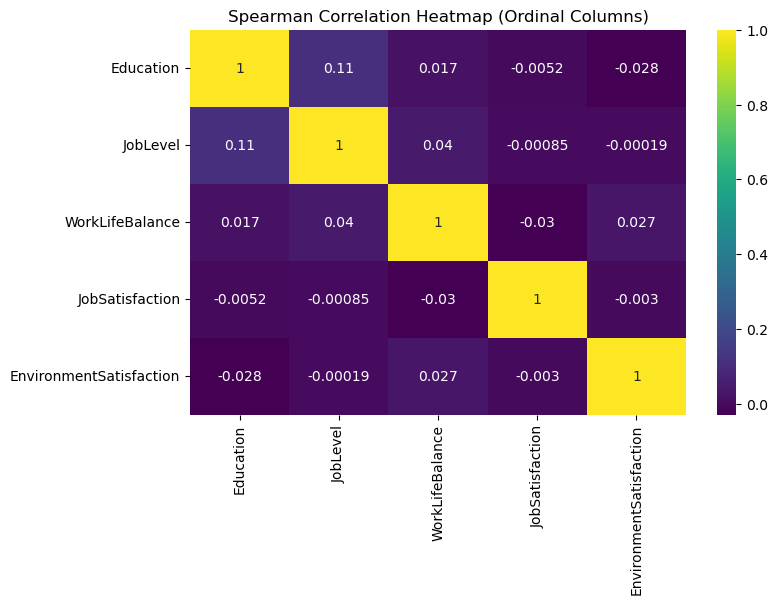

In [7]:
spearman_cols = [
    'Education', 'JobLevel', 'WorkLifeBalance',
    'JobSatisfaction', 'EnvironmentSatisfaction'
]

print("\n📌 Spearman Correlation Matrix:")
spearman_corr = df[spearman_cols].corr(method='spearman')
print(spearman_corr)

# Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(spearman_corr, annot=True, cmap='viridis')
plt.title("Spearman Correlation Heatmap (Ordinal Columns)")
plt.show()


In [8]:
df['Attrition'] = df['Attrition'].astype(str).str.strip().str.title()
df['Attrition_numeric'] = df['Attrition'].map({'Yes': 1, 'No': 0})
print("\n📌 Correlation of Numerical Features with Attrition:")
corr_attr = df.corr(numeric_only=True)['Attrition_numeric'].sort_values(ascending=False)
print(corr_attr)


📌 Correlation of Numerical Features with Attrition:
Attrition_numeric           1.000000
DistanceFromHome            0.077924
NumCompaniesWorked          0.043494
MonthlyRate                 0.015170
PerformanceRating           0.002889
HourlyRate                 -0.006846
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
MonthlyIncome              -0.159840
YearsInCurrentRole         -0.160545
JobLevel                   -0.169105
TotalWorkingYears          -0.171063
Name: Attrition_numeric, dtype: float64


In [9]:
from scipy.stats import chi2_contingency
import pandas as pd

print("\n🔹 CHI-SQUARE TESTS (Categorical vs Categorical)\n")

cat_cols = [
    'Gender','Department','BusinessTravel','JobRole',
    'MaritalStatus','EducationField','OverTime'
]

chi_results = {}

for col in cat_cols:
    table = pd.crosstab(df['Attrition'], df[col])
    chi2, p, dof, exp = chi2_contingency(table)
    chi_results[col] = p
    print(f"{col}: p-value = {p:.4f}  --> {'Significant' if p < 0.05 else 'Not Significant'}")



🔹 CHI-SQUARE TESTS (Categorical vs Categorical)

Gender: p-value = 0.2906  --> Not Significant
Department: p-value = 0.0045  --> Significant
BusinessTravel: p-value = 0.0000  --> Significant
JobRole: p-value = 0.0000  --> Significant
MaritalStatus: p-value = 0.0000  --> Significant
EducationField: p-value = 0.0068  --> Significant
OverTime: p-value = 0.0000  --> Significant


In [10]:
from scipy.stats import ttest_ind

print("\n\n🔹 t-TESTS (Numerical vs Attrition)\n")

df['Attrition_numeric'] = df['Attrition'].map({'Yes':1, 'No':0})

num_cols_to_test = [
    'MonthlyIncome','Age','DailyRate','HourlyRate',
    'MonthlyRate','TotalWorkingYears','DistanceFromHome',
    'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion'
]

for col in num_cols_to_test:
    yes = df[df['Attrition']=='Yes'][col].dropna()
    no = df[df['Attrition']=='No'][col].dropna()
    
    t_stat, p = ttest_ind(yes, no, equal_var=False)
    
    print(f"{col}: p-value = {p:.4f}  --> {'Significant' if p < 0.05 else 'Not Significant'}")




🔹 t-TESTS (Numerical vs Attrition)

MonthlyIncome: p-value = 0.0000  --> Significant
Age: p-value = 0.0000  --> Significant
DailyRate: p-value = 0.0300  --> Significant
HourlyRate: p-value = 0.7914  --> Not Significant
MonthlyRate: p-value = 0.5653  --> Not Significant
TotalWorkingYears: p-value = 0.0000  --> Significant
DistanceFromHome: p-value = 0.0041  --> Significant
YearsAtCompany: p-value = 0.0000  --> Significant
YearsInCurrentRole: p-value = 0.0000  --> Significant
YearsSinceLastPromotion: p-value = 0.1987  --> Not Significant


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

df = pd.read_csv("C:/Users/abds0/Desktop/DAP project/dataset.csv")
df["Attrition"] = df["Attrition"].map({"Yes": 1, "No": 0})
simple_features = ["Age", "MonthlyIncome", "OverTime", "JobSatisfaction", "DistanceFromHome"]
X = df[simple_features]
y = df["Attrition"]
cat_cols = ["OverTime"]
num_cols = ["Age", "MonthlyIncome", "JobSatisfaction", "DistanceFromHome"]
preprocess = ColumnTransformer([
    ("cat", OneHotEncoder(drop='first'), cat_cols),
    ("num", "passthrough", num_cols)])
model = Pipeline([
    ("preprocess", preprocess),
    ("classifier", LogisticRegression(max_iter=300))])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("\nCLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred))
print("\nModel is trained successfully!")



CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       0.50      0.03      0.05        39

    accuracy                           0.87       294
   macro avg       0.68      0.51      0.49       294
weighted avg       0.82      0.87      0.81       294


Model is trained successfully!


In [12]:
sample = pd.DataFrame({
    "Age": [22],
    "MonthlyIncome": [5000],
    "OverTime": ["Yes"],
    "JobSatisfaction": [1],
    "DistanceFromHome": [25]
})
prediction = model.predict(sample)[0]
prob = model.predict_proba(sample)[0][1]
print("Prediction =", prediction)
print("Probability of Attrition =", prob)


Prediction = 1
Probability of Attrition = 0.6709265976809173


In [15]:
new_data = pd.DataFrame({
    "Age": [25, 18],
    "MonthlyIncome": [20000, 7000],
    "OverTime": ["No", "Yes"],
    "JobSatisfaction": [4, 2],
    "DistanceFromHome": [5, 13]
})
preds = model.predict(new_data)
probs = model.predict_proba(new_data)[:,1]
print(preds)
print(probs)

[0 1]
[0.01970809 0.50760877]
